## Keras Callbacks:

1. Using the model history callback.

In [1]:
# Importing the required modules:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder # To apply one-hot encoding on the target.
from sklearn.model_selection import train_test_split

# Loading the input data:
x, y = load_iris(return_X_y=True)

print("Dimensions of x before one-hot encoding are:", x.shape)
print("Dimensions of y before one-hot encoding are:", y.shape)

# Applying one-hot encoding on the target column:
encoder = OneHotEncoder()
encoded_y = (
    encoder
    .fit_transform(y.reshape(-1, 1))
    .todense()
)

print("Dimensions of x after one-hot encoding are:", x.shape)
print("Dimensions of encoded_y are:", encoded_y.shape)

# Splitting the input data into training and testing datasets: 
x_train, x_test, y_train, y_test = train_test_split(
    x, encoded_y,
    test_size=0.25,
    random_state=1024
)

# Defining the keras neural network:
model = Sequential()

# Input layer:
model.add(Dense(10, input_shape=(4,)))

# Hidden Layer:
model.add(Dense(100, activation='relu'))

# Output Layer:
model.add(Dense(3, activation='softmax'))

Dimensions of x before one-hot encoding are: (150, 4)
Dimensions of y before one-hot encoding are: (150,)
Dimensions of x after one-hot encoding are: (150, 4)
Dimensions of encoded_y are: (150, 3)


In [2]:
# Compiling the neural network:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [3]:
# Checking the structure of the neural network:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 1,453
Trainable params: 1,453
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Training the neural network while keeping a track of the history:
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
3/3 [==============================] - 0s 20ms/step - loss: 0.2980 - val_loss: 0.2795
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 0.2895 - val_loss: 0.2899
Epoch 3/30
3/3 [==============================] - 0s 13ms/step - loss: 0.2833 - val_loss: 0.2893
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 0.2796 - val_loss: 0.2752
Epoch 5/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2712 - val_loss: 0.2660
Epoch 6/30
3/3 [==============================] - 0s 12ms/step - loss: 0.2640 - val_loss: 0.2501
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 0.2660 - val_loss: 0.2356
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 0.2553 - val_loss: 0.2434
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 0.2476 - val_loss: 0.2614
Epoch 10/30
3/3 [==============================] - 0s 12ms/step - loss: 0.2468 - val_loss: 0.2520
Epoch 11/30
3/3 [============

In [17]:
# The dictionary containing model metrics for each epoch:
model_history.history 

{'loss': [0.29796966910362244,
  0.2894618809223175,
  0.2832752466201782,
  0.27960437536239624,
  0.27124136686325073,
  0.26399993896484375,
  0.26596835255622864,
  0.25529342889785767,
  0.24764110147953033,
  0.24684113264083862,
  0.23896105587482452,
  0.23293471336364746,
  0.23358581960201263,
  0.22410167753696442,
  0.21778632700443268,
  0.21483533084392548,
  0.20963722467422485,
  0.20450007915496826,
  0.2005992829799652,
  0.19735202193260193,
  0.19394204020500183,
  0.18538649380207062,
  0.18311536312103271,
  0.17964927852153778,
  0.1751524657011032,
  0.17019234597682953,
  0.16684673726558685,
  0.16295604407787323,
  0.15938659012317657,
  0.1570642739534378],
 'val_loss': [0.27949440479278564,
  0.2899226248264313,
  0.2893372178077698,
  0.2752000391483307,
  0.26600074768066406,
  0.250070720911026,
  0.23564215004444122,
  0.24337799847126007,
  0.26141753792762756,
  0.2519558370113373,
  0.236271470785141,
  0.21578723192214966,
  0.2053755819797516,
  0.

<AxesSubplot:>

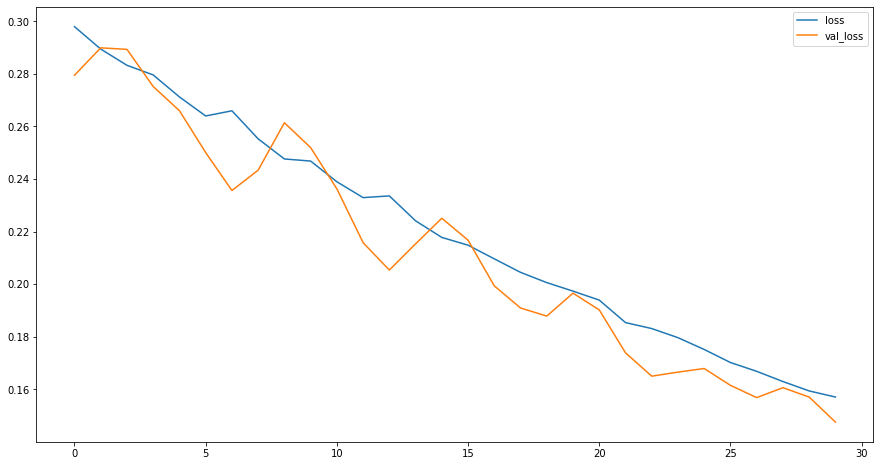

In [18]:
import pandas as pd
historic_information = pd.DataFrame(model_history.history)
historic_information.plot(figsize=(15, 8))

2. Using the early-stopping callback:

In [22]:
# Import Statements:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # Evaluation metric to be followed. 
    patience=10 # No. of epochs to be monitored before stopping the training process.
)

# Training the neural network with early stopping:
model_history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_split=0.3,
    callbacks=[early_stopping]
)

Epoch 1/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1365 - val_loss: 0.1365
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1304 - val_loss: 0.1175
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1305 - val_loss: 0.1136
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1280 - val_loss: 0.1187
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1249 - val_loss: 0.1327
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1215 - val_loss: 0.1297
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.1190 - val_loss: 0.1221
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1174 - val_loss: 0.1099
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1153 - val_loss: 0.1079
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1121 - val_loss: 0.1189
Epoch 11/100
3/3 [===

Although we had defined 100 epochs...the training process stopped after just 41 epochs.

3. Implementing the model checkpoint callback:

In [27]:
from keras.callbacks import ModelCheckpoint

save_model_info = ModelCheckpoint(
    'best_model.hdf5',
    save_best_only=True
)
# Training the neural network with early stopping:
model_history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_split=0.3,
    callbacks=[early_stopping, save_model_info]
)

Epoch 1/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0525 - val_loss: 0.0684
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0514 - val_loss: 0.0589
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.0597
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0512 - val_loss: 0.0757
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0505 - val_loss: 0.0870
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0527 - val_loss: 0.0826
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0488 - val_loss: 0.0656
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0522 - val_loss: 0.0607
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0484 - val_loss: 0.0782
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0505 - val_loss: 0.0902
Epoch 11/100
3/3 [==